# Energy Saver(Street Light Controller) Power Usage Prediction


## Description

A company has implemented more than 100 energy efficiency projects and is now remotely managing more than 100MW load including lakhs of street lamps and tens of thousands of pumps.





CCMS or the Standalone Street Light Controller is a control panel with comprehensive protection, control and monitoring station for a group of street lights. It includes a Class1.0 metering unit and communicates to the SMART web server with GSM/GPRS connection.


## Key Highlights of Street Light controller:

## Problem Statement:
We are tasked with predicting the number of units consumed by each street light controller.The data  is received the IoT device which is deployed in the various states in india.

## Mapping the real world problem to an ML problem

Type of Machine Leaning Problem

Supervised Learning:

It is a regression problem, for a given data we need to predict the energy consumption of the street light controller

## Train and Test Construction
We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.

Importing the Necessary Libraries

In [123]:
import numpy as np
import pandas as pd

## Reading the data

In [ ]:
data=pd.read_csv('Day_Report (VARANASHI) - dayreport.csv')
data

## How many Missing values in the dataset?

In [125]:
#Credit:Prof-Vejey
for i in range(len(data.columns)):
    missing_data = data[data.columns[i]].isna().sum()
    perc = missing_data / len(data) * 100
    print(f'Feature {i+1} >> Missing entries: {missing_data}  |  Percentage: {round(perc, 2)}')

Feature 1 >> Missing entries: 0  |  Percentage: 0.0
Feature 2 >> Missing entries: 0  |  Percentage: 0.0
Feature 3 >> Missing entries: 0  |  Percentage: 0.0
Feature 4 >> Missing entries: 0  |  Percentage: 0.0
Feature 5 >> Missing entries: 0  |  Percentage: 0.0
Feature 6 >> Missing entries: 0  |  Percentage: 0.0
Feature 7 >> Missing entries: 0  |  Percentage: 0.0
Feature 8 >> Missing entries: 0  |  Percentage: 0.0
Feature 9 >> Missing entries: 0  |  Percentage: 0.0
Feature 10 >> Missing entries: 0  |  Percentage: 0.0
Feature 11 >> Missing entries: 0  |  Percentage: 0.0
Feature 12 >> Missing entries: 0  |  Percentage: 0.0
Feature 13 >> Missing entries: 0  |  Percentage: 0.0
Feature 14 >> Missing entries: 0  |  Percentage: 0.0
Feature 15 >> Missing entries: 0  |  Percentage: 0.0
Feature 16 >> Missing entries: 0  |  Percentage: 0.0
Feature 17 >> Missing entries: 0  |  Percentage: 0.0
Feature 18 >> Missing entries: 0  |  Percentage: 0.0
Feature 19 >> Missing entries: 0  |  Percentage: 0.0
Fe

## Visual representation of missing values

<AxesSubplot:>

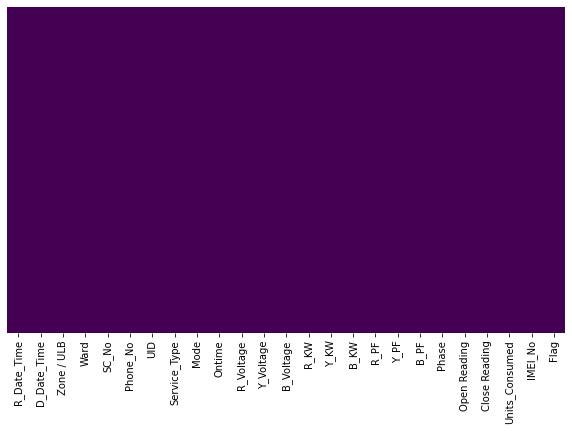

In [126]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis', yticklabels=False)

We do not have any missing values in this dataset

## Handling Categorical data

In [127]:
#Converting the categorical variable into numerical using lable encoder
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
xm=data.apply(LabelEncoder().fit_transform)
xm


,R_Date_Time,D_Date_Time,Zone / ULB,Ward,SC_No,Phone_No,UID,Service_Type,Mode,Ontime,...,B_KW,R_PF,Y_PF,B_PF,Phase,Open Reading,Close Reading,Units_Consumed,IMEI_No,Flag
0,654,369,4,0,239,361,350,0,0,1127,...,0,2,56,8,1,1410,1423,92,242,0
1,627,347,0,40,304,215,211,0,0,721,...,0,88,56,8,1,268,269,61,199,0
2,676,361,2,34,13,134,137,0,0,560,...,0,1,0,8,1,3061,3087,466,162,0
3,671,373,4,14,92,174,149,0,0,868,...,0,0,56,8,1,1499,1513,109,82,0
4,654,373,1,36,73,67,93,0,0,176,...,0,1,0,8,1,2865,2889,231,68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,20,7,4,2,265,345,357,0,0,1115,...,0,2,56,8,1,2337,2362,186,275,0
3316,24,19,1,5,7,93,38,0,0,965,...,0,1,0,8,1,2877,2901,277,38,0
3317,25,14,0,3,142,184,5,0,0,1125,...,0,1,1,8,1,2253,2282,255,260,0
3318,22,12,4,11,248,327,275,0,0,1125,...,0,1,56,8,1,848,867,97,209,0


## Splitting the data 

Input features(Independent Variables)

In [128]:
X = xm.iloc[:,:22]
X

,R_Date_Time,D_Date_Time,Zone / ULB,Ward,SC_No,Phone_No,UID,Service_Type,Mode,Ontime,...,B_Voltage,R_KW,Y_KW,B_KW,R_PF,Y_PF,B_PF,Phase,Open Reading,Close Reading
0,654,369,4,0,239,361,350,0,0,1127,...,0,60,0,0,2,56,8,1,1410,1423
1,627,347,0,40,304,215,211,0,0,721,...,0,36,0,0,88,56,8,1,268,269
2,676,361,2,34,13,134,137,0,0,560,...,0,274,144,0,1,0,8,1,3061,3087
3,671,373,4,14,92,174,149,0,0,868,...,0,75,0,0,0,56,8,1,1499,1513
4,654,373,1,36,73,67,93,0,0,176,...,0,165,64,0,1,0,8,1,2865,2889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,20,7,4,2,265,345,357,0,0,1115,...,0,123,0,0,2,56,8,1,2337,2362
3316,24,19,1,5,7,93,38,0,0,965,...,0,40,141,0,1,0,8,1,2877,2901
3317,25,14,0,3,142,184,5,0,0,1125,...,0,92,89,0,1,1,8,1,2253,2282
3318,22,12,4,11,248,327,275,0,0,1125,...,0,64,0,0,1,56,8,1,848,867


Output Features(Dependent Variable)

In [129]:
y=xm.iloc[:,-3]
y

0        92
1        61
2       466
3       109
4       231
       ... 
3315    186
3316    277
3317    255
3318     97
3319    170
Name: Units_Consumed, Length: 3320, dtype: int64

# Shape

In [130]:
X.shape, y.shape

((3320, 22), (3320,))

# Plotting the correlation values for each feature

In [131]:
xm.corr()

,R_Date_Time,D_Date_Time,Zone / ULB,Ward,SC_No,Phone_No,UID,Service_Type,Mode,Ontime,...,B_KW,R_PF,Y_PF,B_PF,Phase,Open Reading,Close Reading,Units_Consumed,IMEI_No,Flag
R_Date_Time,1.000000,0.997027,-0.022863,0.022723,0.024739,0.013749,0.010084,NaN,0.050304,-0.148135,...,0.004740,0.019571,0.013579,-0.001221,-0.039210,0.003592,0.003003,-0.030978,0.012607,0.020570
D_Date_Time,0.997027,1.000000,-0.021070,0.018747,0.021480,0.008724,0.006362,NaN,0.048906,-0.144198,...,0.003457,0.020319,0.011860,-0.000819,-0.035607,0.007023,0.006436,-0.029944,0.009299,0.011149
Zone / ULB,-0.022863,-0.021070,1.000000,-0.418239,-0.269413,-0.252916,-0.149712,NaN,-0.023605,0.118098,...,0.015016,-0.004758,0.029720,0.023454,0.241932,0.298880,0.296413,-0.200841,-0.264690,-0.096495
Ward,0.022723,0.018747,-0.418239,1.000000,0.034564,0.000122,0.027382,NaN,0.041952,-0.237621,...,0.031971,0.111117,-0.001684,-0.054894,-0.158412,-0.142038,-0.140711,-0.023458,-0.056507,0.008410
SC_No,0.024739,0.021480,-0.269413,0.034564,1.000000,0.587760,0.573256,NaN,0.032597,-0.043976,...,-0.136943,0.011706,0.066548,0.132341,-0.223574,-0.583709,-0.581360,-0.198332,0.571988,0.141571
Phone_No,0.013749,0.008724,-0.252916,0.000122,0.587760,1.000000,0.739762,NaN,-0.007471,-0.040027,...,-0.074032,0.060448,0.067255,0.071693,-0.149456,-0.515819,-0.514217,-0.111387,0.691021,0.134854
UID,0.010084,0.006362,-0.149712,0.027382,0.573256,0.739762,1.000000,NaN,-0.002021,-0.075990,...,-0.099821,0.018656,0.076122,0.101227,-0.174566,-0.574067,-0.572555,-0.216789,0.660627,0.121086
Service_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mode,0.050304,0.048906,-0.023605,0.041952,0.032597,-0.007471,-0.002021,NaN,1.000000,-0.029651,...,0.037856,0.059482,0.025866,-0.003292,0.020513,-0.004399,-0.004181,0.036327,0.002758,-0.011661
Ontime,-0.148135,-0.144198,0.118098,-0.237621,-0.043976,-0.040027,-0.075990,NaN,-0.029651,1.000000,...,0.038561,-0.220320,-0.131923,-0.054348,0.160221,0.197917,0.198981,0.233454,-0.019206,-0.021217


# Plotting the heat map

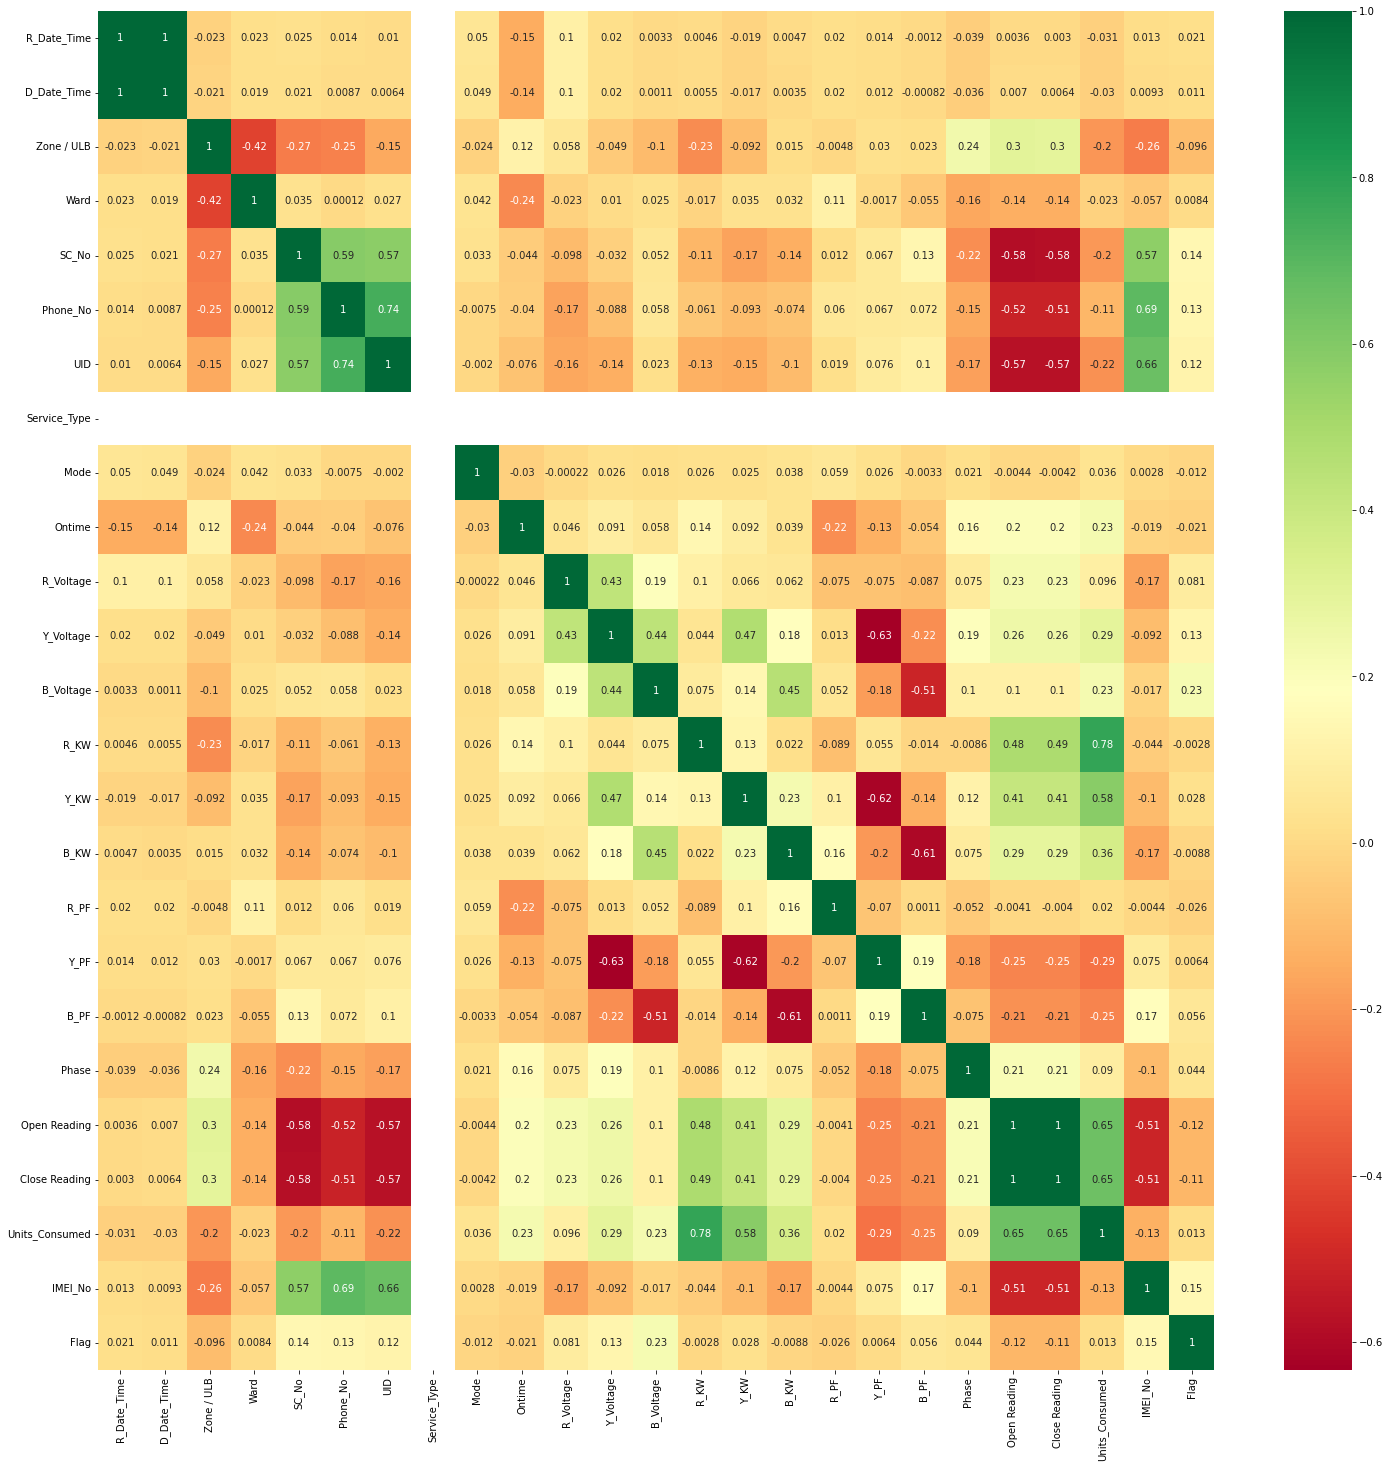

In [233]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns
#get correlations of each features in dataset
corrmat = xm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(xm[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Feature Importance

In [260]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt


In [261]:
model = ExtraTreesRegressor()


In [262]:
model.fit(X,y)

ExtraTreesRegressor()

In [113]:
print(model.feature_importances_)

[0.00111575 0.0010493  0.00683585 0.00699789 0.00946878 0.00637712
 0.0055329  0.         0.00219048 0.01284271 0.00211877 0.00238352
 0.00219037 0.39728364 0.11421965 0.01114137 0.00585853 0.01221955
 0.00474951 0.00181446 0.19711146 0.19649837]


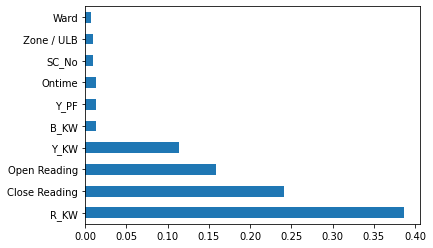

In [263]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Building the Model

# 1.Random Forest Regressor

In [268]:
from sklearn.ensemble import RandomForestRegressor


In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2324, 22)
(996, 22)
(2324,)
(996,)


In [270]:
RFR_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
RFR_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [271]:
y_pred_test = RFR_model.predict(X_test)
y_pred_test

array([135.53,  59.88, 479.19,  99.85, 368.24, 108.57, 200.64, 211.93,
       163.37, 163.02, 252.56,  53.71, 354.33, 103.25, 125.62, 131.14,
       223.67, 144.45,  52.07, 170.21, 229.26, 111.61, 368.41, 164.97,
        86.03, 154.3 , 125.02, 104.51,  52.79, 199.86, 302.4 , 102.25,
       118.28,  24.37, 164.28, 260.38,  26.52, 417.47,  56.07,  57.12,
       169.16,  47.55,  49.96, 219.21, 119.57,  72.09, 124.47, 166.47,
       102.98,  45.99, 174.99, 120.55, 179.82, 113.16, 113.99,  49.8 ,
        56.89, 257.72, 391.58, 163.06, 443.68,  27.04,  64.66,  44.97,
       283.94,  93.78, 453.79,  44.75, 104.28, 103.22, 128.2 , 132.61,
       127.89,  47.6 , 131.2 , 149.43, 271.71, 172.05, 104.06, 130.47,
        65.24, 257.79, 113.81, 103.24, 141.4 , 140.44,   1.32,  67.09,
       235.43, 423.13, 169.22, 340.99,  36.1 , 158.24,  63.88,  29.01,
        33.65, 118.59, 145.83, 218.24,  42.15, 276.55, 102.44,  76.63,
       270.73,  31.85, 210.37,  53.72, 267.97, 107.09, 124.02,  71.11,
      

In [294]:
print('Test_Accuracy',RFR_model.score(X_test, y_test))
print('Train_Accuracy:',RFR_model.score(X_train, y_train))

Test_Accuracy 0.9640351728540623
Train_Accuracy: 0.9960454751769023


 Mean Square Error of the RFR model

In [273]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print ("RMS Error: ", rmse)

r_squared = RFR_model.score(X_train, y_train)
print ("R_squared is: ", r_squared)

RMS Error:  21.713333440455095
R_squared is:  0.9960454751769023


# 2. Linear Regression

In [297]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [296]:
lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [298]:
Y_pred = lm.predict(X_test)

In [299]:
lm.coef_


array([ 1.16921600e-01, -2.23450188e-01, -6.13966338e+00, -3.52650301e-01,
       -2.72788705e-03,  3.47502449e-02, -1.58259687e-02,  7.15899562e-12,
       -9.68853018e+01,  2.17651756e-02, -7.47146989e-03,  6.74982503e-03,
       -1.70253916e-02,  1.00141656e+00,  1.01928212e+00,  1.91340058e+00,
        4.62835027e-02,  2.40675667e-02, -2.76240869e+00,  5.56699826e+00,
       -1.36397328e+00,  1.37660411e+00])

In [300]:
Test_Accuracy=lm.score(X_test,y_test)
Train_Accuracy=lm.score(X_train,y_train)
print("Test_Accuracy:",Test_Accuracy)
print("Train_Accuracy:",Train_Accuracy)

Test_Accuracy: 0.8907092662149891
Train_Accuracy: 0.9360551828509803


Mean Square Error of the LR model

In [301]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print ("RMS Error: ", rmse)

r_squared = lm.score(X_train, y_train)
print ("R_squared is: ", r_squared)

RMS Error:  21.713333440455095
R_squared is:  0.9360551828509803


# 3.Gradient Boosting Regressor

In [284]:
 from sklearn.ensemble import GradientBoostingRegressor

In [285]:
 reg = GradientBoostingRegressor(random_state=0)

In [286]:
 reg .fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [287]:
y_pred = reg.predict(X_test)


In [288]:
print("Accuracy:",reg.score(X_test,y_test))
print("Accuracy:",reg.score(X_train,y_train))

Accuracy: 0.9498582303353704
Accuracy: 0.9822518924310136


Mean Square Error of the GBR model

In [289]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))
print ("RMS Error: ", rmse)

r_squared = reg.score(X_train, y_train)
print ("R_squared is: ", r_squared)

RMS Error:  21.713333440455095
R_squared is:  0.9822518924310136


# 5.Conclusion

In [308]:
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Linear Regression   : {:.04}%        {:.04}%'.format( lm.score(X_test, y_test)* 100,\
                                                  100-(lm.score(X_test, y_test) * 100)))

print('Random Forest       :  {:.04}%        {:.04}% '.format(RFR_model.score(X_test, y_test)* 100,\
                                                           100-(RFR_model.score(X_test, y_test)* 100)))
print('Gradient Boosting   : {:.04}%        {:.04}% '.format(reg.score(X_test, y_test)* 100,\
                                                           100-(reg.score(X_test, y_test)* 100)))


                     Accuracy     Error
                     ----------   --------
Linear Regression   : 89.07%        10.93%
Random Forest       :  96.4%        3.596% 
Gradient Boosting   : 94.99%        5.014% 
